<a href="https://colab.research.google.com/github/elenaajayi/Computer-Vision-Fundamentals---CUS-754/blob/main/ProblemSet_07%5CProblemSet_07_NN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 07 - Basics of Neural Network Basics

**Professor:** Dr. Christoforos Christoforou

In this problem set, you will practice building a basic neural network based on the theory covered and in course and using TensorFlow, an open-source library to help you develop and train ML models. For this problem set, you will need the following library references, which are pre-installed with the colab environment.


In [4]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1: Load and proprocess the dataset.

For this example, you will use the MNIST dataset, one of the benchmark image dataset. The dataset comprise images of handwritten digits. It is available in the `tensorflow.keras.dataset` module and can be loaded using the `mnist.load_data()` method. The code below showcases how to load the MINST dataset

```python
# Load the image dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```
The `X_train` has dimensions (60000, 28,28) representing 60000 images, each 28 by 28 pixels. The first axis corresponds the #images and the rest of the dimensions specify the color intensity for each pixel. Similarly, `X_test` has dimension (10000, 28,28) representing 10000 observations.

The `y_train` has dimensions (60000,) with values 0 to 9, representing each of the digit classes.

**Task 1.1** In the cell below load the MNIST Dataset.


In [5]:
# Load the mist dataset

from tensorflow.keras.datasets import mnist

# Load the image dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#print shapes
print('X_train shape:', X_train.shape)  # (60000, 28, 28) - 60,000 training images, each 28x28 pixels
print('y_train shape:', y_train.shape)  # (60000,) - 60,000 training labels (digits 0-9)
print('X_test shape:', X_test.shape)   # (10000, 28, 28) - 10,000 testing images, each 28x28 pixels
print('y_test shape:', y_test.shape)   # (10000,) - 10,000 testing labels (digits 0-9)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Once you load the dataset, you need to convert the images into a format appropriate for the neural network to operate on them. The pre-processing steps are as follow:

* Reshape data array to `channels_last` (i.e. (obs,row,cols,color)) or `channel_first` (i.e. (obs,color,row,cols)) format; depending on what format is supported by the library. Since, tensorflow expects the input vector be be given in a `channel_last` format we need to convert each image to a (obs, row, cols, color) format.
* Convert data array to float32.
* Normalize data array (i.e. divide by 255)
* Convert labels to categorical variables (i.e. one-hot encoding) using the tensorflow.keras.utils.to_categorical(y_train).

The code below showcases one why this can be done in python, for a `ndarray` `X_train` , and how to encode a label vector to one-hot encoding.

```python
# Get the shape of the ndarray
(Nobs_train, n_rows, n_cols) = X_train.shape

# Reshpep array to (obs,row,cols,color); convert to float and normalize
X_train = X_train.reshape(Nobs_train,n_rows,n_cols,1).astype('float32')/255

# Convert y_train labels to one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train)
```
**Task 1.2** In the cell below, standardize the X_train, X_test, y_train and y_test, by applying the necessary preprocessing steps outlined above.

In [6]:
# Implement task 1.2 in this cell

import tensorflow as tf # for one hot encoding

#reshape and normalize x_train and x_test
#reshape to add a channel dimension (grayscale images, channel = 1)
#pixel values to the range [0,1] by dividing by 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255


#one-hot encode y_train and y_test
# turn the labels into one-hot encoded vectors
#num_classes = 10 b/c there are digit classes (0-9)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Exercise 2:Building a Neural Network using high-level Keras API

In this introductory example, we will build a neural network using high-level Keras API. For that, you will need several objects provided by the API; which include the `Sequential` model which is defined under the module `tensorflow.keras.models`, and two computational layers, namely the `Flatten` layer and the `Dense` layer, which are defined under the `tensorflow.keras.layers module`. These libraries have been imported at the beginning of the notebook, but to make this section self-contained, we re-import them in the cell below.

In [7]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import time

**Defining the neural network architecture**
We can define the neural network architecture using the keras API. First, we define a general `Sequential` model and then `add` to it the various computational layer. For our example, we first need to add a `Flatten` layer to convert the 2D image into a 1D vector, and then `add` two dense layers, one layer has 256 nodes; and the second one - which serves as an output layer- has 10 nodes. Each element in the output layer represents one of the categories we are trying to classify (i.e. digits 0 to 9) and its value correspond to the probability the input belong to each class. We can define this architecture using the `Keras API` as follows:

```python
model = Sequential()
model.add(Flatten()) # add a layer to convert the 2D image to a 1D vector
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))
```
Notice, the first `Dense` layer uses the `relu` activation function, and the output `Dense` layer uses the `softmax` activation function. Recall, the softmax normalizes the output vectors so that all entries are positive and sum up to one; thus the resulting output can be thought of as a probability over the categories.

**Task 2.1** In the cell below, define the neural network architecture specified in the section above.

In [8]:
# Implement task 2.1

#create a sequential model

model = Sequential()

#add a flatten layer to convert the 2D image to a 1D vector
model.add(Flatten())

#add a dense layer with 256 nodes and relu activation function
model.add(Dense(256, activation='relu'))

#add a dense layer with 10 nodes and softmax activation function
model.add(Dense(10, activation='softmax'))


**Compile the Neural Network Architecture**
Once we define the model, we need to compile it using the `model.compile` method of the API. As part of the compiling, we define can define the following parameters (among others):.

* the **loss** function* to use for training the model.
* the **optimizer** method to use in optimizing and, typically, we use the `adam` optimizer;
* any *metrics* we want to track while fitting the model (i.e. accuracy)

In this example, since we are dealing with a multi-class classification, we can set the loss function to be `categorical_crossentropy`. For your reference, the categorical cross entropy (CCE) is calculated as:

$$
CCE = -\sum_{c\in C} y_c log(\sigma(\hat{y})_c)
$$

where $y_c$ is the ground truth value of the c-th element in the output vector (i.e. c-th class), $\hat{y}_c$ is the c-th element in the predicted output vector, and $\sigma(.)$ is the `softmax` method. Notice, that the categorical cross entropy implementation in TensorFlow expects the label vector $y$ to be given as a `one-hot-encoding` form.

The code below illustrates how to apply the `model.compile` method, to compile the network architecture

```python
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

```

**Task 2.2:** Compile the Neural Network Architecture you defined in task 2.1



In [9]:


#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



**Training the model**

Once we defined and compiled our model, we can train it by calling the `model.fit` method of the API. The `model.fit` expects as input  the training set and a number of fitting configuration parameters. Two commonly used parameters are that of `batch_size` and `epochs`. The code below illustrates how to fit a model.

```python
  # Batch size: refers to the size of data we use in a single pass;
  batch_size = 128

  # Epochs, the number of times to iterate over the dataset  
  epochs = 15

  model.fit(X_train,y_train, batch_size=batch_size, epochs = epochs,validation_data=(X_test,y_test))
```
**Task 2.3** Train the model by calling the `model.fit` method


In [10]:
# Use this cell in implement task 2.3

# batch size: refers to the size of data we use in a single pass;
batch_size = 128

# epochs, the number of times to iterate over the dataset, like reviewing notes multiple times to learn better (in term sof training the data better)
epochs = 15

#train the model
history = model.fit(
    X_train, y_train,  #training data (input features and target labels)
    batch_size=batch_size,  #setting the batch size
    epochs=epochs,  #setting the number of epochs
    validation_data=(X_test, y_test)  #providing validation data for monitoring
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8500 - loss: 0.5343 - val_accuracy: 0.9556 - val_loss: 0.1590
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9597 - loss: 0.1417 - val_accuracy: 0.9660 - val_loss: 0.1139
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9733 - loss: 0.0928 - val_accuracy: 0.9729 - val_loss: 0.0895
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9821 - loss: 0.0645 - val_accuracy: 0.9744 - val_loss: 0.0827
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9856 - loss: 0.0503 - val_accuracy: 0.9779 - val_loss: 0.0752
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9893 - loss: 0.0395 - val_accuracy: 0.9799 - val_loss: 0.0674
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9922 - loss: 0.0294 - val_accuracy: 0.9789 - val_loss: 0.0696
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9937 - loss: 0.0245 - val_accuracy: 0.

**Evaluating the Network model performance**

Once the model has been trained, we can evaluate its performance on a test set by using `model.evaluate` method. The `evaluate` method task as input a validation set and returns a tuple which includes the loss score and an accuracy score. The code below illustrates how to use the evaluate method

```python
(loss_score, accuracy_score) = model.evaluate(X_test,y_test,verbose=0)
```

**Task 2.4:** Evaluate the model you trained in task 2.3 and report its accuracy and loss.


In [11]:
# Use this cell to implement task 2.4
(loss_score, accuracy_score) = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss_score)
print('Test accuracy:', accuracy_score)


Test loss: 0.08256761729717255
Test accuracy: 0.9785000085830688


**Apply the trained model**

Once the model is trained, and the evaluation shows an acceptable performance, we can apply the model to make prediction on new unseen data using the `model.predict` method. The `model.predict(X_test)` returns a ndarry of shape (obs, 10) which represents a probability vector over categories. To make a concrete class assignment we can return the class with the hieghest predicted probability. We can identify the entry with the highest probability for each vector by using the `np.argmax` method accross each row (i.e. accross axis 1). The code above illustrates how to do that.

```python
y_predict = np.argmax(model.predict(X_test),axis=1)
```

**Task 2.5** Apply the model you trained in task 2.4 on the test set and report its performance. Moreover, identify the first three instances the model misclassifies and display their image; indicating in the title the predicted value.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


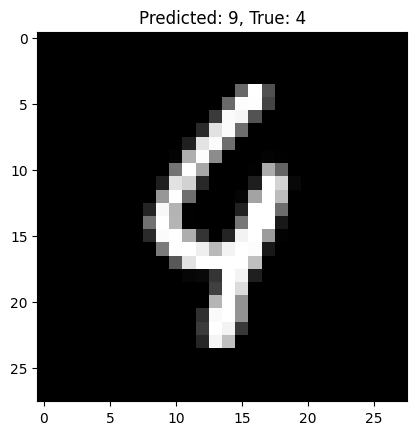

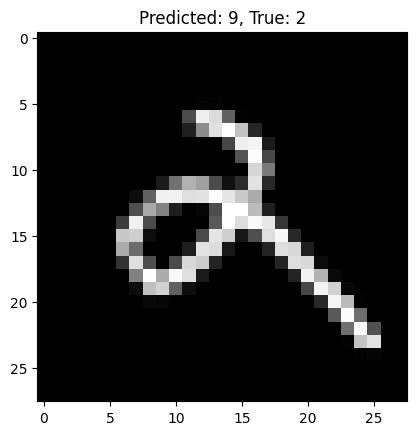

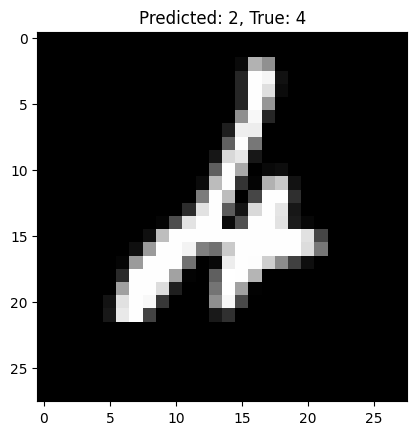

In [13]:
# Use this cell to implement task 2.5



#get model predictions, note this returns a probability vector
# we can turn this into class labels with argmax which gives us the index of highest prob
# this index corresponds to the class (digit 0-9)
# basically, argmax finds the index of the biggest value in an array, which here, is the index with the highest probability for each prediction, and we know this index is the digit
y_pred_probs = model.predict(X_test)  # Get predicted probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability

#also turn y_test (true labels) to class labels  same as y_pred
y_true = np.argmax(y_test, axis=1)       # Get the true class labels


#find instances where model's predictions dont match actual values
# np.where finds the locations (indices) of elements that meet a certain condition.
# in this case, the condition is when the predicted label is not the same as the true label
misclassified_indices = np.where(y_pred != y_true)[0]  # Find indices of misclassified instances

#display the first 3 instances that were wrong;
# if there's less than 3, just show those
for i in range(min(3, len(misclassified_indices))):
    index = misclassified_indices[i]
    plt.figure()
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, True: {y_true[index]}")
    plt.show()

## Exercise 3
In the first to exercises, you reproduced a network architecture provided to you. In this exercise you are expected to create your own architecture to outperform the model from exercise 2. Repeat all the steps including, defining the network architecture; compile your model, train your model and evaluate your model. You are a allowed to use the `Flatten` layer, and as many `Dense` layers as you like (optionally, we might consider using a `Dropout` layer - which we did not discuss yet). Some things you can try to improve your architecture are
* Introduce mode Dense layers.
* Change the number of nodes in each layer.
* Introduce one or more Dropout layers [see an example tutorial](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/)


In [14]:
# Use the cell below to implement Exercise 3. Add more cells as need

#import tensorflow bc
import tensorflow as tf

# define a 'sequential' model, which means we're basically stacking layers on top of each other like legos
model_improved = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Input layer (flattening the images) # this layer basically turns our images into a 1D array, cuz neural networks like those better
    tf.keras.layers.Dense(512, activation='relu'),  # First hidden layer with 512 nodes and ReLU activation # this layer has 512 nodes and uses 'relu' activation. relu is pretty popular for hidden layers
    tf.keras.layers.Dropout(0.2),  # Dropout layer to reduce overfitting (20% dropout rate) # this layer helps reduce overfitting (which is when our model gets too good at the training data and does bad on new data), dropout basically randomly turns off some nodes during training to make things less predictable
    tf.keras.layers.Dense(256, activation='relu'),  # Second hidden layer with 256 nodes and ReLU activation # another hidden layer, this one with 256 nodes
    tf.keras.layers.Dropout(0.2),  # Dropout layer  #more dropout to help overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 digits) and softmax activation # this is the output layer, 10 nodes cuz 10 digits (0-9) and 'softmax' to give us probabilities for each digit
])

# need to compile the model to setup training
model_improved.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# adam is the optimizer, it helps find the best values for our model parameters
# categorical crossentropy is the loss function, it basically measures how well our model's predictions match the true values
# accuracy is what we're gonna use to measure performance, so higher accuracy = better model

# time to train our model; fit function helps with this
history_improved = model_improved.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))
# X_train, y_train are our training data and labels
# epochs are the number of times we go over the entire training dataset
# batch size is the number of samples we look at before updating the model
# validation_data is our testing data, so we can check our progress

# now we evaulate how the model did
loss, accuracy = model_improved.evaluate(X_test,  y_test, verbose=2)
print("Improved model accuracy: {:5.2f}%".format(100 * accuracy))
# evaluate gives us loss and accuracy on the test set
# we print the accuracy to see how we did

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8557 - loss: 0.4735 - val_accuracy: 0.9650 - val_loss: 0.1103
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9642 - loss: 0.1167 - val_accuracy: 0.9755 - val_loss: 0.0757
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9769 - loss: 0.0759 - val_accuracy: 0.9787 - val_loss: 0.0675
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9824 - loss: 0.0543 - val_accuracy: 0.9803 - val_loss: 0.0618
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9846 - loss: 0.0466 - val_accuracy: 0.9832 - val_loss: 0.0566
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9864 - loss: 0.0409 - val_accuracy: 0.9790 - val_loss: 0.0694
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9888 - loss: 0.0329 - val_accuracy: 0.9814 - val_loss: 0.0668
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9894 - loss: 0.0310 - val_ac

## Compare the models  

Exercise 2 Model Accuracy: 0.9785
Exercise 3 Model Accuracy: 0.9812
Accuracy Improvement: 0.27%
Exercise 2 Model Loss: 0.0826
Exercise 3 Model Loss: 0.0779
Loss Reduction: 0.0046


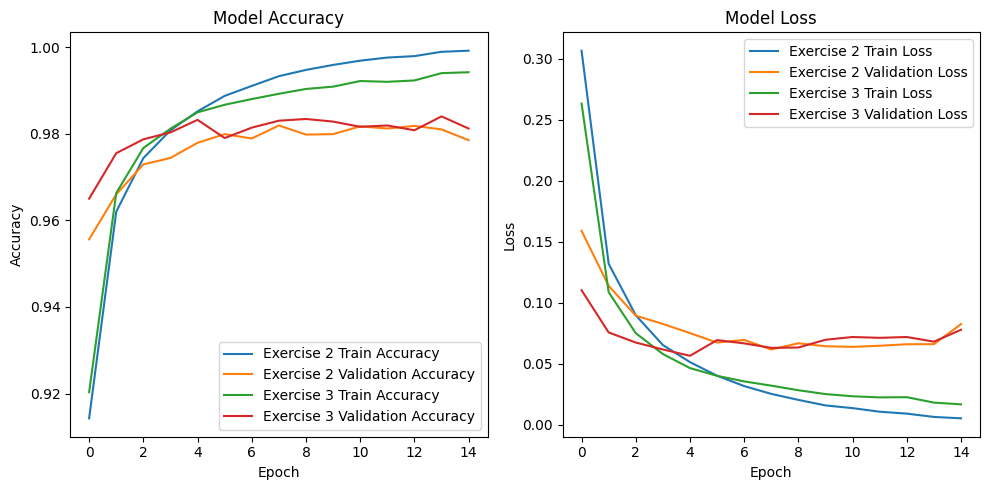

In [15]:
# Use this cell to report the performance of your network, and compare it to the network in exercise

# Assuming 'history' is the training history from Exercise 2
# and 'history_improved' is the training history from Exercise 3

#accuracy comparison ---
accuracy_exercise2 = history.history['val_accuracy'][-1]  #last value in validation accuracy
accuracy_exercise3 = history_improved.history['val_accuracy'][-1]  #last value in validation accuracy

print(f"Exercise 2 Model Accuracy: {accuracy_exercise2:.4f}")
print(f"Exercise 3 Model Accuracy: {accuracy_exercise3:.4f}")

improvement = (accuracy_exercise3 - accuracy_exercise2) * 100
print(f"Accuracy Improvement: {improvement:.2f}%")

#loss Comparison
loss_exercise2 = history.history['val_loss'][-1]  #last value in validation loss
loss_exercise3 = history_improved.history['val_loss'][-1]  #last value in validation loss

print(f"Exercise 2 Model Loss: {loss_exercise2:.4f}")
print(f"Exercise 3 Model Loss: {loss_exercise3:.4f}")

loss_reduction = (loss_exercise2 - loss_exercise3)  # asolute loss reduction
print(f"Loss Reduction: {loss_reduction:.4f}")

# plotting Training Curves
plt.figure(figsize=(10, 5))

# plot accuracy curves
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Exercise 2 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Exercise 2 Validation Accuracy')
plt.plot(history_improved.history['accuracy'], label='Exercise 3 Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Exercise 3 Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# plot loss curves
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Exercise 2 Train Loss')
plt.plot(history.history['val_loss'], label='Exercise 2 Validation Loss')
plt.plot(history_improved.history['loss'], label='Exercise 3 Train Loss')
plt.plot(history_improved.history['val_loss'], label='Exercise 3 Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()  # adjust layout to prevent overlapping
plt.show()


Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.